## Data
For Task#1, use the [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris). 

For Task#2, use the images in folder `Project1\images` where the filenames are the corresponding class labels. For example, `182.png` is an image of Border Terrier, which is class 182 in ImageNet dataset. Please refer to [this Gist snippet](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) for a complete list. The images are from ImageNet validation set, and so the pre-trained model has never "seen" them.

For Task#3, you may use the images in folder `Project1\style` or any other images you like.

In [1]:
# Loading packages, pls install those packages if you haven't install them
import PIL
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
import random

import pandas as pd
print("pandas version: {}".format(pd.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier # neural network
from sklearn import metrics

import torch
import torchvision
import torch.autograd as autograd
import torchvision.transforms as T

pandas version: 1.1.3
scikit-learn version: 0.23.2


# Task#1 MLP Structure Search

Multilayer Perceptrons, or MLPs for short, are the classical type of neural network. They are comprised of one or more layers of neurons. Data is fed to the input layer, there may be one or more hidden layers providing levels of abstraction, and predictions are made on the output layer, also called the visible layer. MLPs are suitable for classification prediction problems where inputs are assigned a class or label. However, the number of nodes in each hidder layer will affect the final prediction performance. 

Cross-validation is a statistical method used to estimate the skill of machine learning models. Please implement the k-fold cross-validation test by yourself. Do not use the k-fold method in external packages. The general procedure is as follows:
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
   1. Take the group as a hold out or test data set
   2. Take the remaining groups as a training data set
   3. Fit a model on the training set and evaluate it on the test set
   4. Retain the evaluation score and discard the model


In this project, perform a 5-fold Cross-validation test on the Iris dataset to determine the best 5-layer MLP structure (from among 1 to 4 nodes in the layer) for test prediction. Provide a plot of the average 5-fold
training and test accuracies over the different network structures.

 

In [2]:
def find_network_size(X_train, y_train):
    """
    Find the hidden node size that gives the best validation accuracy by 5-fold Cross-validation test, plots the average 5-fold 
    training and test accuracies over the different network structures.
    
    Inputs:
    - X_train: Input Features; Tensor of shape (120, 4)
    - y_train: An integer in the range [0, 3)
    
    Returns:
    - Nhidden: the size that gives the best validation accuracy
    """
    
    #The lists to store the training and validation accuracies cross different node size. 
    acc_train_array = []
    acc_valid_array = []
   
    
    #iteration to find the best node size 
    ##############################################################################
    # TODO: Find the hidden node size that gives the best validation accuracy by #
    #5-fold Cross-validation test.                                               #
    ##############################################################################
    # your code
    #print(X_train.shape)
    #print(y_train.shape)
    #normalize data
    #Data_normalizer = sklearn.preprocessing.Normalizer(norm='l1').fit(X_train)
    #x_train_norm = Data_normalizer.transform(X_train)
    
    #shuffle dataset
    k=5
    size = len(X_train)
    num_elements = int(size/k)
    seed = random.randint(1, 10)
    np.random.seed(seed)
    #shuffled_x = np.random.permutation(x_train_norm)
    shuffled_x = np.random.permutation(X_train)
    #print(shuffled_x.shape)
    np.random.seed(seed)
    shuffled_y = np.random.permutation(y_train)
    #split into k groups
    k_x = np.reshape(shuffled_x, (k, num_elements, 4))
    k_y = np.reshape(shuffled_y, (k, num_elements))
    #print(k_x.shape)
    #print(k_y.shape)
    #3A, B, C, D
    for i in range(1, 5):
        valid_acc_avg = 0.0;
        train_acc_avg = 0.0;
        for j in range(k):
            train_x_set = k_x[np.arange(k)!=j].reshape(((k-1)*num_elements, 4))
            train_y_set = k_y[np.arange(k)!=j].reshape(((k-1)*num_elements))
            test_x_set = k_x[j]
            test_y_set = k_y[j]
            
            #set iterations to 10000 to remove unable to converge warning
            clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i,i,i,i,i), random_state=1, max_iter=10000)
            clf.fit(train_x_set, train_y_set) 
            
            valid_y_predict = clf.predict(test_x_set)
            valid_acc = metrics.accuracy_score(valid_y_predict, test_y_set)
            
            train_y_predict = clf.predict(train_x_set)
            train_acc = metrics.accuracy_score(train_y_predict, train_y_set)
            
            valid_acc_avg = valid_acc_avg + valid_acc
            train_acc_avg = train_acc_avg + train_acc
        
        valid_acc_avg = valid_acc_avg/k
        train_acc_avg = train_acc_avg/k
        acc_train_array.append(train_acc_avg)
        acc_valid_array.append(valid_acc_avg)
    
    Best_Nhidden = acc_valid_array.index(max(acc_valid_array))+1
    #print(Best_Nhidden)
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

      
    ##############################################################################
    # TODO: Plots  the average 5-fold training and test accuracies over the      #
    #different node size.                                                        #
    ##############################################################################
    # your code
    node_size = [1, 2, 3, 4]
    plt.plot(node_size, acc_train_array, '-gx')
    plt.plot(node_size, acc_valid_array, '-rx')
    plt.legend(['train', 'valid'])
    plt.xlabel('node size')
    plt.ylabel('accuracy')
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return Best_Nhidden

        
    

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


best hidden node size = 4 based on 5-fold cross-validation on training set
test accuracy = 1.0


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


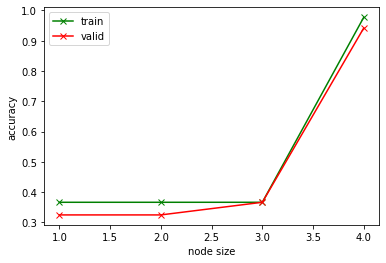

In [3]:
## load data
iris_dataset = load_iris()
## shuffle and split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                        iris_dataset['target'], 
                                                        test_size=0.20, 
                                                        random_state=1)
## find the best hidden node size using only the training set
Nhidden = find_network_size(X_train, y_train)
print('best hidden node size =', Nhidden, 'based on 5-fold cross-validation on training set')

## perform evaluation
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(Nhidden,Nhidden,Nhidden,Nhidden,Nhidden), random_state=1)
clf.fit(X_train, y_train)

## trained output
y_test_predict = clf.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test_predict,y_test)

print('test accuracy =', test_accuracy)

## Pretrained Model (for task 2 and task 3)

For this project, you will use MLP and a pre-trained deep neural network, [SqueezeNet](https://arxiv.org/abs/1602.07360), which is lightweight and runs fast on CPUs. Run the code below to load a pre-trained SqueezeNet from the PyTorch official model zoo.

In [4]:
# Test and set the device.
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'
#device = 'cpu'
print('Use', device)

# Download and load the pretrained SqueezeNet model.
model = torchvision.models.squeezenet1_1(pretrained=True).to(device)

# Disable the gradient computation with respect to model parameters.
for param in model.parameters():
    param.requires_grad = False

Use cuda:0




## Helper Functions (for task 2 and task 3)

Most pre-trained models are trained on images that had been preprocessed by subtracting the per-color mean and dividing by the per-color standard deviation. Here are a few helper functions for performing and undoing this preprocessing.

In [5]:
IMAGENET_MEAN = np.array([0.485, 0.456, 0.406])
IMAGENET_STD = np.array([0.229, 0.224, 0.225])

def preprocess(img, size=(224, 224)):
    transform = T.Compose([
        T.Resize(size),
        T.ToTensor(),
        T.Normalize(mean=IMAGENET_MEAN.tolist(),
                    std=IMAGENET_STD.tolist()),
        T.Lambda(lambda x: x[None]),
    ])
    return transform(img)

def deprocess(img, should_rescale=True):
    transform = T.Compose([
        T.Lambda(lambda x: x[0]),
        T.Normalize(mean=[0, 0, 0], std=(1.0 / IMAGENET_MEAN).tolist()),
        T.Normalize(mean=(-IMAGENET_STD).tolist(), std=[1, 1, 1]),
        T.Lambda(rescale) if should_rescale else T.Lambda(lambda x: x),
        T.ToPILImage(),
    ])
    return transform(img)

def rescale(x):
    low, high = x.min(), x.max()
    x_rescaled = (x - low) / (high - low)
    return x_rescaled

def blur_image(X, sigma=1):
    X_np = X.cpu().clone().numpy()
    X_np = gaussian_filter1d(X_np, sigma, axis=2)
    X_np = gaussian_filter1d(X_np, sigma, axis=3)
    X.copy_(torch.Tensor(X_np).type_as(X))
    return X

# Task#2 Class Visualization
By starting with a random noise image and performing gradient ascent on a target class, we can generate an image that the network will recognize as the target class. This idea was first presented in [2]; [3] extended this idea by suggesting several regularization techniques that can improve the quality of the generated image.

Concretely, let $I$ be an image and let $y$ be a target class. Let $s_y(I)$ be the score that a convolutional network assigns to the image $I$ for class $y$; note that these are raw unnormalized scores, not class probabilities. We wish to generate an image $I^*$ that achieves a high score for the class $y$ by solving the problem

$$
I^* = \arg\max_I (s_y(I) - R(I))
$$

where $R$ is a (possibly implicit) regularizer (note the sign of $R(I)$ in the argmax: we want to minimize this regularization term). We can solve this optimization problem using gradient ascent, computing gradients with respect to the generated image. We will use (explicit) L2 regularization of the form

$$
R(I) = \lambda \|I\|_2^2
$$

**and** implicit regularization as suggested by [3] by periodically blurring the generated image. We can solve this problem using gradient ascent on the generated image.

In the cell below, complete the implementation of the `create_class_visualization` function.

[2] [Karen Simonyan, Andrea Vedaldi, and Andrew Zisserman, "Deep Inside Convolutional Networks: Visualising
Image Classification Models and Saliency Maps", ICLR Workshop 2014](https://arxiv.org/abs/1312.6034)

[3] [Yosinski et al, "Understanding Neural Networks Through Deep Visualization", ICML 2015 Deep Learning Workshop](https://arxiv.org/abs/1506.06579)


In [6]:
def jitter(X, ox, oy):
    """
    Helper function to randomly jitter an image.
  
    Inputs
    - X: PyTorch Tensor of shape (N, C, H, W)
    - ox, oy: Integers giving number of pixels to jitter along W and H axes
    
    Returns: A new PyTorch Tensor of shape (N, C, H, W)
    """
    if ox != 0:
        left = X[:, :, :, :-ox]
        right = X[:, :, :, -ox:]
        X = torch.cat([right, left], dim=3)
    if oy != 0:
        top = X[:, :, :-oy]
        bottom = X[:, :, -oy:]
        X = torch.cat([bottom, top], dim=2)
    return X

In [9]:
def create_class_visualization(target_y, model, device, **kwargs):
    '''
    Generate an image to maximize the score of target_y under a pretrained model.
    
    Inputs:
    - target_y: A list of two elements, where the first value is an integer in the range [0, 1000) giving the index of the
                class, and the second value is the name of the class.
    - model: A pretrained CNN that will be used to generate the image
    - dtype: Torch datatype to use for computations
    
    Keyword arguments:
    - l2_reg: Strength of L2 regularization on the image
    - learning_rate: How big of a step to take
    - num_iterations: How many iterations to use
    - blur_every: How often to blur the image as an implicit regularizer
    - max_jitter: How much to gjitter the image as an implicit regularizer
    - show_every: How often to show the intermediate result
    '''
    model.to(device)
    l2_reg = kwargs.pop('l2_reg', 1e-3)
    learning_rate = kwargs.pop('learning_rate', 25)
    num_iterations = kwargs.pop('num_iterations', 100)
    blur_every = kwargs.pop('blur_every', 10)
    max_jitter = kwargs.pop('max_jitter', 16)
    show_every = kwargs.pop('show_every', 25)
    
    # Randomly initialize the image as a PyTorch Tensor, and make it requires gradient.
    img = torch.randn(1, 3, 224, 224).mul_(1.0).to(device).requires_grad_()

    for t in range(num_iterations):
        # Randomly jitter the image a bit; this gives slightly nicer results
        ox, oy = random.randint(0, max_jitter), random.randint(0, max_jitter)
        img.data.copy_(jitter(img.data, ox, oy))

        ########################################################################
        # TODO: Use the model to compute the gradient of the score for the     #
        # class target_y with respect to the pixels of the image, and make a   #
        # gradient step on the image using the learning rate. Don't forget the #
        # L2 regularization term!                                              #
        # Be very careful about the signs of elements in your code.            #
        ########################################################################
        # your code
        scores = model(img)
        loss = l2_reg*torch.norm(img,p=2)-0.125*scores[0,target_y[0]]
        loss.backward()
        # Update img
        with torch.no_grad():
            img -= learning_rate*img.grad
            # Manually zero the gradients after updating weights
            img.grad.zero_()
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        # Undo the random jitter
        img.data.copy_(jitter(img.data, -ox, -oy))

        # As regularizer, clamp and periodically blur the image
        for c in range(3):
            lo = float(-IMAGENET_MEAN[c] / IMAGENET_STD[c])
            hi = float((1.0 - IMAGENET_MEAN[c]) / IMAGENET_STD[c])
            img.data[:, c].clamp_(min=lo, max=hi)
        if t % blur_every == 0:
            blur_image(img.data, sigma=0.5)

        # Periodically show the image
        if t == 0 or (t + 1) % show_every == 0 or t == num_iterations - 1:
            plt.imshow(deprocess(img.data.clone().cpu()))
            class_name = target_y[1]
            plt.title('%s\nIteration %d / %d' % (class_name, t + 1, num_iterations))
            plt.gcf().set_size_inches(4, 4)
            plt.axis('off')
            plt.show()

    return deprocess(img.data.cpu())

Once you have completed the implementation in the cell above, run the following cell to generate an image of a Tarantula:

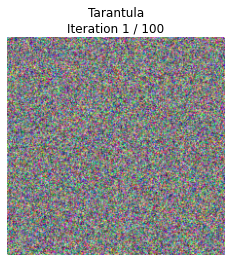

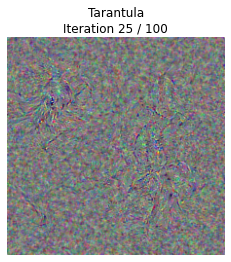

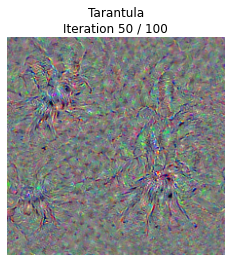

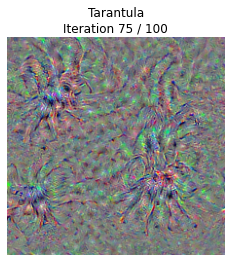

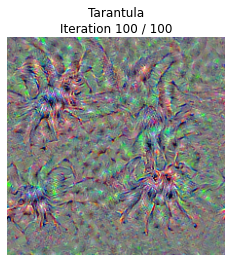

In [10]:
target_y = [76, "Tarantula"]
#target_y = [366, "Gorilla"]
out = create_class_visualization(target_y, model, device)

# Task#3 Style Transfer

Another task which is closely related to image gradients is style transfer which has become a "cool" application in deep learning for computer vision applications. You need to study and implement the style transfer technique presented in the following paper [4] where the general idea is to take two images (a content image and a style image), and produce a new image that reflects the content of one but the artistic "style" of the other.

[4] [Gatys, Leon A., Alexander S. Ecker, and Matthias Bethge. "Image style transfer using convolutional neural networks." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2016.](http://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf)

Below is an example.

![](style_transfer.png)

## Compute the loss

To perform style transfer, you will need to first formulate a special loss function that matches the content and style of each respective image in the feature space, and then perform gradient descent on the pixels of the image itself.

The loss function contains two parts: **content loss** and **style loss**. Read the paper [4] for details about the losses and implement them below.

In [17]:
def content_loss(content_weight, content_current, content_original):
    """
    Compute the content loss for style transfer.
    
    Inputs:
    - content_weight: Scalar giving the weighting for the content loss.
    - content_current: features of the current image; this is a PyTorch Tensor of shape
      (1, C_l, H_l, W_l).
    - content_target: features of the content image, Tensor with shape (1, C_l, H_l, W_l).
    
    Returns:
    - scalar content loss
    """
    
    ##############################################################################
    # TODO: Implement content loss function                                      #
    # Note: It should not be very much code (less than 10 lines)                 #
    ##############################################################################
    # your code
    return content_weight*torch.sum((content_current-content_original)**2)
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

def gram_matrix(features):
    """
    Compute the normalized Gram matrix from features.
    The Gram matrix will be used to compute style loss.
    
    Inputs:
    - features: PyTorch Tensor of shape (N, C, H, W) giving features for
      a batch of N images.
    
    Returns:
    - gram: PyTorch Tensor of shape (N, C, C) giving the
      normalized Gram matrices for the N input images.
    """    
    ##############################################################################
    # TODO: Implement the normalized Gram matrix compuation function             #
    # Note: It should not be very much code (less than 10 lines)                 #
    ##############################################################################
    # your code
    #N = num images, C = num filters, H = height, W = width
    
    N,C,H,W = features.size()
    features = features.view(N*C, H*W)
    gram = torch.mm(features, features.t())
    gram = gram.div(N*C*H*W)
    return gram
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################


def style_loss(feats, style_layers, style_targets, style_weights):
    """
    Computes the style loss at a set of layers.
    
    Inputs:
    - feats: list of the features at every layer of the current image.
    - style_layers: List of layer indices into feats giving the layers to include in the
      style loss.
    - style_targets: List of the same length as style_layers, where style_targets[i] is
      a PyTorch Variable giving the Gram matrix of the source style image computed at
      layer style_layers[i].
    - style_weights: List of the same length as style_layers, where style_weights[i]
      is a scalar giving the weight for the style loss at layer style_layers[i].
      
    Returns:
    - style_loss: A PyTorch Tensor holding a scalar giving the style loss.
    """
    
    ##############################################################################
    # TODO: Implement style loss function                                        #
    # Note: It should not be very much code (less than 10 lines)                 #
    ##############################################################################
    # your code
    loss = 0
    for i,layer in enumerate(style_layers):
        current_gram = gram_matrix(feats[layer])
        N, M = current_gram.size()
        loss += style_weights[i]*torch.sum((current_gram-style_targets[i])**2)/4
    return loss
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

## Putting them together

With these loss functions, you can now build your style transfer model. Implement the function below to perform style transfer. To test the model, you can use the content and style images that we have provided in `Project1/style`, or improvise using any image you like. Please save your output images in the `Project1/style` folder.

Design and carry out some experiments (on your own!) to analyse how **the choice of layers** and **the weights** will influence the output image. Write down your observations and analysis in the Markdown cell provided below.

In [27]:
def style_transfer(content_image, style_image, content_layer, content_weight,
                   style_layers, style_weights, max_iter):
    """
    Run style transfer!
    You may first resize the image to a small size for fast computation.
    
    Inputs:
    - content_image: filename of content image
    - style_image: filename of style image
    - content_layer: an index indicating which layer to use for content loss
    - content_weight: weighting on content loss
    - style_layers: list of indices indicating which layers to use for style loss
    - style_weights: list of weights to use for each layer in style_layers
    - max_iter: max iterations of gradient updates
    
    Returns:
    - output_image: an image with content from the content_image and 
    style from the style image
    """
    ##############################################################################
    # TODO: Implement the function for style transfer.                           #
    ##############################################################################
    # your code
    def extract_features(data,model):
        feats = []
        prev_feat = data
        for module in model.features:
                next_feat = module(prev_feat)
                feats.append(next_feat)
                prev_feat = next_feat
        return feats
    
    # function to remove white noise
    def variance_loss(image):
        loss = 0
        # row
        loss += torch.sum( ( image[:,:,1:,:] - image[:,:,:-1,:] )**2 ) 
        # column
        loss += torch.sum( ( image[:,:,:,1:] - image[:,:,:,:-1] )**2 )
        return loss
    
    # get content image
    content_img = preprocess(PIL.Image.open(content_image)).to(device)
    feats = extract_features(content_img,model)
    content_target = feats[content_layer].clone()
    # get style image
    style_img = preprocess(PIL.Image.open(style_image)).to(device)
    feats = extract_features(style_img,model)
    style_target = []
    for layer in style_layers:
        style_target.append(gram_matrix(feats[layer].clone()))
    # Transfer image
    # Use original content image as target image
    transfer_img = content_img.clone().requires_grad_()
    # allow gradient computation
    transfer_img_var = autograd.Variable(transfer_img, requires_grad=True)
    # Hyperparameters
    learning_rate = 0.5
    alpha = 0.1
    beta = 1
    
    # Training
    optimizer = torch.optim.Adam([transfer_img_var],lr=learning_rate)
    
    for i in range(max_iter):
        # enhance contrast ratio
        transfer_img_var.data.clamp_(-1,1)
        # Init grad
        optimizer.zero_grad()
        feats = extract_features(transfer_img_var, model)
        # compute loss
        c_loss = content_loss(content_weight, feats[content_layer], content_target)
        s_loss = style_loss(feats, style_layers, style_target, style_weights)
        v_loss = variance_loss(transfer_img_var)
        total_loss = alpha*c_loss + beta*s_loss + 0.1*v_loss
        # BP
        total_loss.backward()
        optimizer.step()
    
    # Plot input images
    fig = plt.figure()
    ax = fig.add_subplot(121)
    ax.imshow(deprocess(content_img.cpu()))
    ax.set_title('Content Source Img')
    plt.axis('off')
    
    ax = fig.add_subplot(122)
    ax.imshow(deprocess(style_img.cpu()))
    ax.set_title('Style Source Img')
    plt.axis('off')
    plt.show()
    
    plt.figure()
    plt.imshow(deprocess(transfer_img.data.cpu()))
    plt.title('Transfer Img')
    plt.axis('off')
    deprocess(transfer_img.data.cpu()).save('style/style_transfer.png')
    plt.show()
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ############################################################################## 

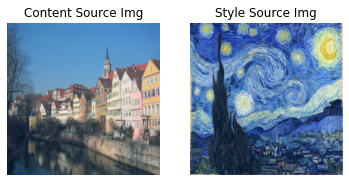

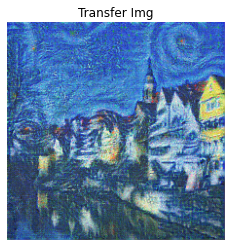

In [34]:
##############################################################################
# TODO: 1. Choose one pair of images under 'Project1/style', and finish the  # 
#          neural style transfer task by calling the style_transfer function.#
#       2. Show the 3 related images: content image, style image and the     # 
#          generated style-transferred image.                                #
##############################################################################
# your code
#print(model)
params1 = {
    'content_image' : 'style/tubingen.jpg',
    'style_image' : 'style/starry_night.jpg',
    'content_layer' : 3,
    'content_weight' : 1,
    'style_layers' : (0, 3, 6, 9),
    'style_weights' : (20000000, 150000, 25, 1),
    'max_iter' : 500
}
style_transfer(**params1)
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

---

**Write your observations and analysis in this Markdown cell:**

---

#### Content:
As the content layer index increases, the transfer image will 'look' more like the style source image. The deeper the network, the less the layers care about an exact match and activate highly when the key features are generally in the right place. We are able to determine which layers are most concerned with by setting the style weights to 0 for the specific layer. As a result, layer 3 was chosen to be the content layer. 

When setting the content weight, the larger the content weight, the more the the image would look like the content image. Therefore, a small value needs to be chosen in order for the style to be able to be transfered to the content image. 

#### Style:
For style, the lower layers responds to the smaller repetitive features while the higher layer focuses more on the abstract and global features.Therefore, in order to capture the entire style of the style layer, it is imperative to include layers from all depths in the network. We are also able to determine the general style of the image by setting the content weights to 0. In addition, the layers that were chosen are layers that have just gone through max pooling (3, 6, 9).

When setting the style weights, content weight is set to 0 in order to get a better idea of how the general style would look like before the transfer. When increasing the weights of higher layers, larger weights would result in a more concentrated color present in the style image (black, blue and yellow) while retaining the shape of the content image. While increasing the weights of lower layers would focus more on the smaller patterns (swirls and yellow circles).

#### Learning Rate:
When setting learning rate to a higher value, it is observed that the trasnfer image will start to look more like the style image. However, if the learning rate is set too large, it would result in a blurred image.

#### Alpha & Beta
The ratio of alpha and beta when computing the total loss controls the similarity of either to content image or style image. The higher the alpha, the more the transfer will look like the transfer image.